## Ant Colony Optimization
Luis Ramírez Guzmán
A01638402

In [1]:
!pip install acopy
!pip install networkx
!pip install folium

In [2]:
import acopy
import tsplib95
import networkx
import folium
import pandas as pd

Carga de coordenadas de ciudades y visualización de gráfica simple.

In [3]:
problem = tsplib95.load('Europe15.tsp')
G = problem.get_graph()

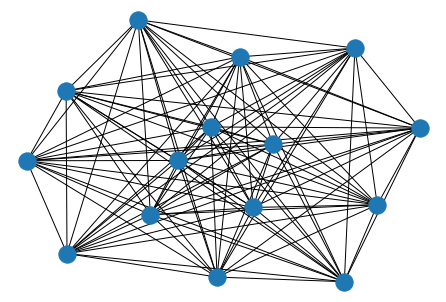

In [4]:
networkx.draw(G)

Carga de latitudes y longitudes con nombre de ciudad para visualización.

In [5]:
df = pd.read_csv('EuropeCities.txt', header=None)
df.index += 1
df.head()

,0,1,2,3
1,1,52.5200,13.4050,Berlin
2,2,47.5162,14.5501,Vienna
3,3,48.8566,2.3522,Paris
4,4,52.4000,4.9000,Amsterdam
5,5,51.9000,4.5000,Rotterdam


In [6]:
m = folium.Map(location=[52.5200, 13.4050], zoom_start=4)
for i in range(len(df)):
  folium.CircleMarker(
      location=[df[1][i+1], df[2][i+1]],
      radius=5,
      fill=True,
      fill_opacity=0.9,
      tooltip=df[3][i+1]
  ).add_to(m)
m

Inicializar colonia de hormigas.

In [7]:
solver = acopy.Solver(rho=.03, q=1)
colony = acopy.Colony(alpha=1, beta=3)

Solución de recorrido con costo y nodos.

In [8]:
tour = solver.solve(G, colony, limit=10000)

In [9]:
tour.cost

40

In [10]:
nodes = tour.nodes
nodes

[15, 12, 11, 10, 9, 8, 6, 5, 4, 7, 14, 1, 2, 13, 3]

Resultado final:

In [11]:
for i in range(1, len(nodes)):
  loc = [(df[1][nodes[i-1]], df[2][nodes[i-1]]),
       (df[1][nodes[i]], df[2][nodes[i]])]
  folium.PolyLine(loc,
                color='red',
                weight=5,
                opacity=0.5).add_to(m)
folium.PolyLine([(df[1][nodes[-1]], df[2][nodes[-1]]), (df[1][nodes[0]], df[2][nodes[0]])],
                color='red',
                weight=5,
                opacity=0.5
                ).add_to(m)
m